## **Limpieza y tranformación de datos los 4 conjutnos de datos**

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Cargamos los 4 conjuntos de datos**

In [36]:
df_2012_2020 = pd.read_csv('../data/raw/mex_trade_2012_2020.csv')
df_2012_2020.head()

,prod_est,coverage,type,year,month,concept,value_usd,status
0,Trade Balance of Goods of Mexico,National,Exports,2012,1,Total Exports,27281.577,Final Figures
1,Trade Balance of Goods of Mexico,National,Exports,2012,1,Petroleum,4628.295,Final Figures
2,Trade Balance of Goods of Mexico,National,Exports,2012,1,Crude Oil,4008.115,Final Figures
3,Trade Balance of Goods of Mexico,National,Exports,2012,1,Other Oil,620.180,Final Figures
4,Trade Balance of Goods of Mexico,National,Exports,2012,1,Non Petroleum,22653.282,Final Figures


In [37]:
df_2021 = pd.read_csv('../data/raw/mex_trade_2021.csv')
df_2021.head()

,prod_est,coverage,type,year,month,concept,value_usd,status
0,Trade Balance of Goods of Mexico,National,Exports,2021,1,Total Exports,32716.018,Adjusted Figures
1,Trade Balance of Goods of Mexico,National,Exports,2021,1,Petroleum,1824.723,Adjusted Figures
2,Trade Balance of Goods of Mexico,National,Exports,2021,1,Crude Oil,1589.219,Adjusted Figures
3,Trade Balance of Goods of Mexico,National,Exports,2021,1,Other Oil,235.505,Adjusted Figures
4,Trade Balance of Goods of Mexico,National,Exports,2021,1,Non Petroleum,30891.295,Adjusted Figures


In [38]:
df_2022 = pd.read_csv('../data/raw/mex_trade_2022.csv')
df_2022.head()

,prod_est,coverage,type,year,month,concept,value_usd,status
0,Trade Balance of Goods of Mexico,National,Exports,2022,1,Total Exports,33923.041,Final Figures
1,Trade Balance of Goods of Mexico,National,Exports,2022,1,Petroleum,2491.027,Final Figures
2,Trade Balance of Goods of Mexico,National,Exports,2022,1,Crude Oil,2022.813,Final Figures
3,Trade Balance of Goods of Mexico,National,Exports,2022,1,Other Oil,468.214,Final Figures
4,Trade Balance of Goods of Mexico,National,Exports,2022,1,Non Petroleum,31432.014,Final Figures


In [39]:
df_2023 = pd.read_csv('../data/raw/mex_trade_2023.csv')
df_2023.head()

,prod_est,coverage,type,year,month,concept,value_usd,status
0,Trade Balance of Goods of Mexico,National,Exports,2023,1,Total Exports,42609.734,Revised Figures
1,Trade Balance of Goods of Mexico,National,Exports,2023,1,Petroleum,2715.928,Revised Figures
2,Trade Balance of Goods of Mexico,National,Exports,2023,1,Crude Oil,2089.954,Revised Figures
3,Trade Balance of Goods of Mexico,National,Exports,2023,1,Other Oil,625.974,Revised Figures
4,Trade Balance of Goods of Mexico,National,Exports,2023,1,Non Petroleum,39893.806,Revised Figures


**Cantidad de filas y columnas**

In [40]:
dic_df = {
    'df_2012_2020': df_2012_2020,
    'df_2021': df_2021,
    'df_2022': df_2022,
    'df_2023':df_2023
}

for nombre,df in dic_df.items():
    filas, columnas = df.shape
    print(f'Filas y columnas de {nombre}')
    print(f'Filas: {filas}\nColumnas: {columnas}\n')

Filas y columnas de df_2012_2020
Filas: 1944
Columnas: 8

Filas y columnas de df_2021
Filas: 216
Columnas: 8

Filas y columnas de df_2022
Filas: 216
Columnas: 8

Filas y columnas de df_2023
Filas: 180
Columnas: 8



**Unimos los 4 conjutos de datos en uno solo**

In [41]:
df_2012_2023 = pd.concat([df_2012_2020, df_2021, df_2022, df_2023])
filas, columnas = df_2012_2023.shape

print('Filas y columnas del DataFrame 2012 - 2023 (unión de los 4 conjuntos de datos)')
print(f'Filas: {filas}\nColumnas: {columnas}')

Filas y columnas del DataFrame 2012 - 2023 (unión de los 4 conjuntos de datos)
Filas: 2556
Columnas: 8


**Descripción del nuevo conjunto de datos**

In [42]:
df_2012_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2556 entries, 0 to 179
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   prod_est   2556 non-null   object 
 1   coverage   2556 non-null   object 
 2   type       2556 non-null   object 
 3   year       2556 non-null   int64  
 4   month      2556 non-null   int64  
 5   concept    2556 non-null   object 
 6   value_usd  2556 non-null   float64
 7   status     2556 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 179.7+ KB


* Ahora nuestro nuevo conjunto de dato contiene *2556* filas y *8* columnas.
* Los tipo de tados de cada columna son correctos por lo cual no sera necesario cambiar el tipo de datos de cada columna.

**Verificamos los valores nulos y duplicados**

In [43]:
# Verificar valores nulos
valores_nulos = df_2012_2023.isnull().sum()
print(f'Nulos\n{valores_nulos}')

# Verificar duplicados
duplicados = df_2012_2023.duplicated().sum()
print(f'\nDuplicados: {duplicados}')


Nulos
prod_est     0
coverage     0
type         0
year         0
month        0
concept      0
value_usd    0
status       0
dtype: int64

Duplicados: 0


Los campos ***prod_est, converge, type, concept, status*** ya se revisaron durante el EDA inicial: no se detectaron errores ni necesidad de limpieza adicional en dichos campos.

**Analizar los valores negatios encontrados en el primer analisis exploratorio**

In [44]:
valores_negativos = df_2012_2023[df_2012_2023['value_usd'] < 0]
print(f'Cantidad de valores negativos: {len(valores_negativos)}')
valores_negativos.head(10)

Cantidad de valores negativos: 199


,prod_est,coverage,type,year,month,concept,value_usd,status
16,Trade Balance of Goods of Mexico,National,Not applicable,2012,1,Total Trade Balance Exports Total - Imports Total,-267.418000,Final Figures
17,Trade Balance of Goods of Mexico,National,Not applicable,2012,1,Total Trade Balance Exports Total - Imports To...,-1013.224000,Final Figures
35,Trade Balance of Goods of Mexico,National,Not applicable,2012,2,Total Trade Balance Exports Total - Imports To...,-267.776000,Final Figures
71,Trade Balance of Goods of Mexico,National,Not applicable,2012,4,Total Trade Balance Exports Total - Imports To...,-366.619000,Final Figures
89,Trade Balance of Goods of Mexico,National,Not applicable,2012,5,Total Trade Balance Exports Total - Imports To...,-532.382000,Final Figures
107,Trade Balance of Goods of Mexico,National,Not applicable,2012,6,Total Trade Balance Exports Total - Imports To...,-166.668000,Final Figures
124,Trade Balance of Goods of Mexico,National,Not applicable,2012,7,Total Trade Balance Exports Total - Imports Total,-409.644000,Final Figures
125,Trade Balance of Goods of Mexico,National,Not applicable,2012,7,Total Trade Balance Exports Total - Imports To...,-1224.047000,Final Figures
142,Trade Balance of Goods of Mexico,National,Not applicable,2012,8,Total Trade Balance Exports Total - Imports Total,-981.812999,Final Figures
143,Trade Balance of Goods of Mexico,National,Not applicable,2012,8,Total Trade Balance Exports Total - Imports To...,-1844.143000,Final Figures


In [45]:
concept = valores_negativos['concept']
concept.value_counts()

concept
Total Trade Balance Exports Total - Imports Total CIF    115
Total Trade Balance Exports Total - Imports Total         84
Name: count, dtype: int64

In [49]:
# Ver si hay otros conceptos con valores negativos distintos a la balanza comercial
otros_negativos = valores_negativos[~valores_negativos['concept'].str.contains('Trade Balance', case=False)]
print(f'Otros valores negativos fuera del concepto de balanza: {len(otros_negativos)}')
otros_negativos.head()

Otros valores negativos fuera del concepto de balanza: 0


,prod_est,coverage,type,year,month,concept,value_usd,status


*Los valores negativos corresponden exclusivamente al concepto de balanza comercial, por lo que no se consideran errores de origen, sino parte del fenómeno económico analizado.*

Los valores negativos en value_usd corresponden a la balanza comercial (exports - imports). Se retienen porque reflejan periodos con déficit comercial, lo cual es relevante para el análisis económico.

In [46]:
Q1 = df_2012_2023['value_usd'].quantile(0.25)
Q3 = df_2012_2023['value_usd'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_2012_2023[(df_2012_2023['value_usd'] < Q1 - 1.5 * IQR) | (df_2012_2023['value_usd'] > Q3 + 1.5 * IQR)]
print(f"Outliers detectados por IQR: {len(outliers)}")

Outliers detectados por IQR: 0


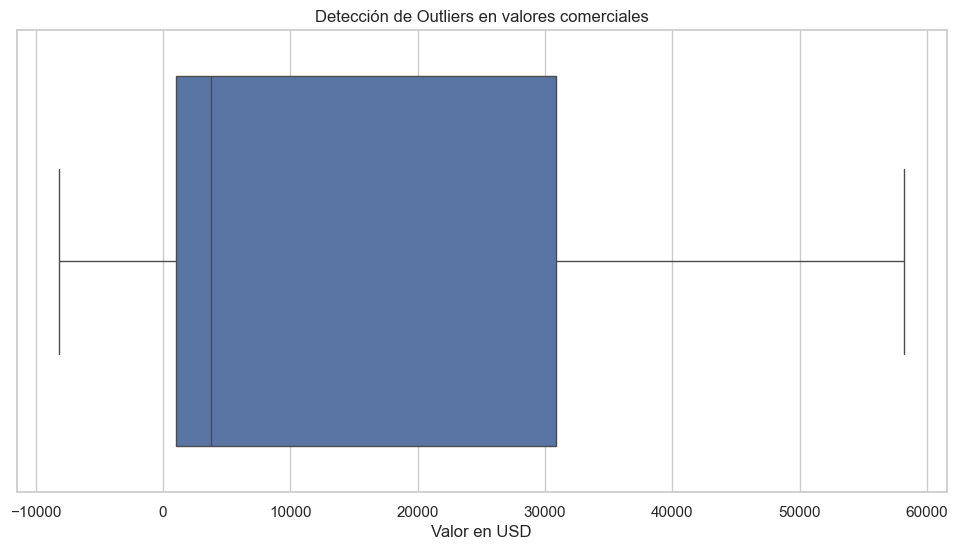

In [47]:
# --- 2. Boxplot para detectar outliers ---
plt.figure()
sns.boxplot(x=df_2012_2023['value_usd'])
plt.title('Detección de Outliers en valores comerciales')
plt.xlabel('Valor en USD')
plt.show()

No se encotraron valores atípicos en los datos que sean relevantes (que afecten el proposito del proyecto).

**Guardar el nuevo conjunto de datos**

In [50]:
df_2012_2023.to_csv('../data/processed/mex_trade_2012_2023_clean.csv', index=False)
print('CSV guardado')

CSV guardado
